<a href="https://colab.research.google.com/github/SoyoungKim-LOP/fastcampus-meetup/blob/master/Ex_colab_code_week02_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 포스트 코로나 시대의 경제 상황을 국민연금 가입자 오픈데이터를 통해 알아보자?!!

- 데이터셋: 공공 데이터 포털
- 형태: 파일데이터 (csv)
- 다운로드: https://www.data.go.kr/data/3046071/fileData.do

# 2주차 수업 안내 
## Description: Introducion to the Impact of Learning(IOL) about Learning intention  
### (1) 목표: pandas를 활용해 간단한 통계 분석과 함께 데이터 전처리에 대해 학습
### (2) 내용: 탐색적 데이터 분석 방법과 기초 통계에 관한 이해력 향상
- (1 단계) EDA(Extrapolatory Data Analysis): 탐색적 데이터 분석
- (2 단계) 데이터 전처리 
- (3 단계) 판다스로 데이터 읽기 및 값 불러오기
- (4 단계) 기초 통계 방법에 관한 이해: p-value, 신뢰구간 등  

### (3) 실습: [경제 데이터를 분석해 보자]
- 국민연금 데이터를 통한 포스트 코로나 시대 경제 상황 분석 보고서를 이용하여 Pandas사용하기, EDA실습하기 및 데이터 전처리 실습!

In [ ]:
# 한글 깨짐 현상에 대한 해결 방법
# (1) 나눔 폰트 설치 (Nanum)
# (2) 코랩의 런타임을 재시작!
# (3) matplotlib의 폰트를 Nanum 폰트로 지정함!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (45.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and di

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (10,7)

pd.set_option('display.float_format', lambda x: '%.2f' %x)

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Capstone-project/data/national-pension-202008.csv', encoding='cp949')

In [ ]:
# df.head()

#### Column 정리 (Clean)

In [ ]:
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

In [ ]:
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실',]

In [ ]:
print("df.columns 열개수:", len(df.columns))
print("columns 열개수:", len(columns))

df.columns 열개수: 22
columns 열개수: 22


In [ ]:
df.columns = columns   # df.columns에 새로 정리한 columns을 대입

In [ ]:
df.head()

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,시군구코드,읍면동코드,사업장형태,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실
0,202007,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,610,330,1,292201,동력식 수지 공구 제조업,19880101,10101,10101,5,792720,0,0
1,202007,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,650,320,1,701700,화장터 운영 묘지 분양 및 관리업,19880101,10101,10101,13,3278460,0,0
2,202007,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,590,101,1,659202,신용조합,19880101,10101,10101,14,4839540,0,1
3,202007,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,260,119,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,19880101,10101,10101,28,5575460,0,0
4,202007,희성전자(주),106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,170,131,1,701201,비주거용 건물 임대업(점포 자기땅),19880101,10101,10101,496,208935540,0,2


#### 데이터 전처리(정제) : 핵심 데이터 column 추출

In [ ]:
df_main = df[['사업장명', '가입자수', '신규', '상실', '고지금액']]   # 특정 변수에 대한 정보를 추출하기 위함

In [ ]:
# df.head()
df_main.head()

,사업장명,가입자수,신규,상실,고지금액
0,우성기전(주),5,0,0,792720
1,서능공원묘지운영회(재),13,0,0,3278460
2,노들새마을금고,14,0,1,4839540
3,유창성업(주),28,0,0,5575460
4,희성전자(주),496,0,2,208935540


#### 데이터 분석: 통계 처리

In [ ]:
df_main['신규'].mean()

0.8304567228935282

In [ ]:
df_main['상실'].mean()

0.6406682860726561

In [ ]:
df_main['가입자수'].mean()

19.58097191500251

In [ ]:
df_main['고지금액'].mean()

5682724.167521281

#### 월급, 연봉 추정 하기

In [ ]:
(df_main['고지금액'] / df_main['가입자수']).head()  # 인당고지금액 계산

0   158544.00
1   252189.23
2   345681.43
3   199123.57
4   421241.01
dtype: float64

In [ ]:
# 인당고지금액 열(column) 추가하기
df_main['인당고지금액'] = df_main['고지금액'] / df_main['가입자수']
df_main.head()

,사업장명,가입자수,신규,상실,고지금액,인당고지금액
0,우성기전(주),5,0,0,792720,158544.00
1,서능공원묘지운영회(재),13,0,0,3278460,252189.23
2,노들새마을금고,14,0,1,4839540,345681.43
3,유창성업(주),28,0,0,5575460,199123.57
4,희성전자(주),496,0,2,208935540,421241.01


In [ ]:
df['인당고지금액'] = df['고지금액'] / df['가입자수']
df.head()

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,시군구코드,읍면동코드,사업장형태,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실,인당고지금액
0,202007,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,610,330,1,292201,동력식 수지 공구 제조업,19880101,10101,10101,5,792720,0,0,158544.00
1,202007,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,650,320,1,701700,화장터 운영 묘지 분양 및 관리업,19880101,10101,10101,13,3278460,0,0,252189.23
2,202007,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,590,101,1,659202,신용조합,19880101,10101,10101,14,4839540,0,1,345681.43
3,202007,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,260,119,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,19880101,10101,10101,28,5575460,0,0,199123.57
4,202007,희성전자(주),106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,170,131,1,701201,비주거용 건물 임대업(점포 자기땅),19880101,10101,10101,496,208935540,0,2,421241.01


In [ ]:
df_main['인당고지금액'].head()

0   158544.00
1   252189.23
2   345681.43
3   199123.57
4   421241.01
Name: 인당고지금액, dtype: float64

-------------------------------------------------------------------------------------------------------------------
**국민연금 정보로 어떻게 연봉정보를 계산하나요?**


국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다.

-----------------------
** [수식] **
- 임직원 평균 월급 = 인당고지금액 / 9% * 100%
- 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [ ]:
df_main['평균월급'] = df_main['인당고지금액'] / 9 *100
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [ ]:
df_main['평균연봉'] = df_main['평균월급'] * 12
df['평균연봉'] = df['평균월급'] * 12

In [ ]:
df_main['평균월급'].notnull().sum()

490078

In [ ]:
df['평균월급'].notnull().sum()

490078

#### [부록] matplotlib에서 한글폰트 사용하기

**(1) 버전, 설치위치, 설정위치, 캐시위치 확인하기**

In [ ]:
print('matplotlib-버전:', mpl.__version__)
print('설치위치: ', mpl.__file__)
print('설정위치: ', mpl.get_configdir())
print('캐시위치: ', mpl.get_cachedir())

matplotlib-버전: 3.2.2
설치위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
설정위치:  /root/.config/matplotlib
캐시위치:  /root/.cache/matplotlib


**(2) matplotlib의 위치정보를 알았으니 터미널을 이용해 해당 위치로 간다**

In [ ]:
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc


**(3) 설치된 폰트를 찍어봄**

In [ ]:
import matplotlib.font_manager as fm
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# print(font_list)
len(font_list)

27

In [ ]:
font_list[:10] # 폰트리스트에서 10개만 가져오기

['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf']

In [ ]:
f = [f.name for f in fm.fontManager.ttflist]
# print(f)

In [ ]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')]

#### ------------------------------------------------------------------------------------------------------------------------
#### Seaborn을 사용한 데이터 분포 시각화: (참고: https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)
- 1차원 실수 분포 플롯(Plot):
  (1) rugplot: 러그는 데이터 위치를 x축위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여주는 방법
  (2) kdeplot: 커널밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법
  (3) distplot: 러그와 커널밀도 표시 기능을 동시에 갖고 있어 hist함수보다 많이 사용됨

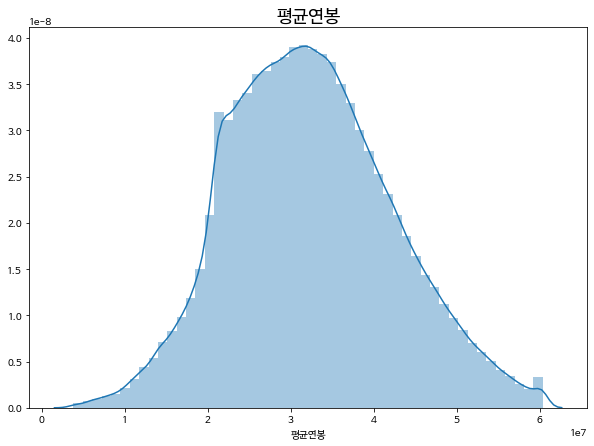

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'   # 주피터 노트북에서 사용할 때 설치 문제 (다시 보기)
fontprop = fm.FontProperties(fname=path, size=18)  # 한글폰트가 여전히 깨지는 문제 질문

plt.figure(figsize=(10,7)) 
sns.distplot(df_main.loc[df_main['평균연봉'].notnull(), '평균연봉'], kde=True, rug=False)  # rug = True 변경시 그래프 표현의 차이에 관한 질문 
plt.title('평균연봉', fontproperties = fontprop)
plt.show()

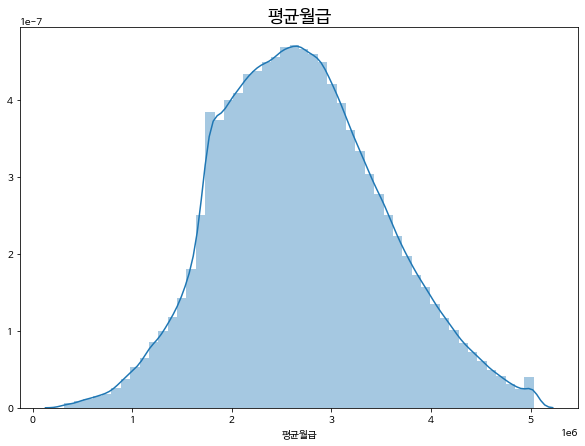

In [ ]:
plt.figure(figsize=(10,7)) 
sns.distplot(df_main.loc[df_main['평균월급'].notnull(), '평균월급'], kde=True, rug=False)  # rug = True 변경시 그래프 표현의 차이에 관한 질문 
plt.title('평균월급', fontproperties = fontprop)
plt.show()

#### 정렬(Order)
- sort_values()
- sort() : 리스트 안의 값에 대한 정렬(기본값: 오름차순 정렬, reverse()함수는 내림차순 정렬)

In [ ]:
# 신규 입사자수가 가장 많은 순서대로 
df_main.sort_values(by='가입자수', ascending=False).head(20)   # 가입자수가 적은 순서대로 추출하려면 (가입자수 =0 제외한 데이터 추출하려면)  

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
4634,삼성전자(주),103139,485,538,45835633380,444406.42,4937849.07,59254188.85
3586,현대자동차(주),68010,593,301,30036022820,441641.27,4907125.23,58885502.76
14872,엘지전자(주),40239,395,419,17465807440,434051.73,4822796.97,57873563.59
155649,에스케이하이닉스 주식회사,27812,121,124,12305766780,442462.49,4916249.89,58994998.71
204863,(주)이마트,27366,297,343,6768839680,247344.87,2748276.32,32979315.84
172766,엘지디스플레이(주),26673,52,87,11142632400,417749.50,4641661.11,55699933.27
221358,삼성디스플레이(주),23189,91,125,10191465180,439495.67,4883285.26,58599423.17
3479,주식회사 케이티,22527,15,76,9961182900,442188.61,4913206.82,58958481.82
3529,한국전력공사,22494,34,87,9382844160,417126.53,4634739.22,55616870.63
6561,홈플러스(주),21338,81,227,4869716640,228218.04,2535756.05,30429072.64


In [ ]:
# 신규 입사자수가 가장 많은 순서대로 
df_main.sort_values(by='신규', ascending=False).head(20)  

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
485929,인천공항경비주식회사,3477,2752,15,909147360,261474.65,2905273.90,34863286.74
413884,쿠팡풀필먼트서비스 유한회사,8749,2655,2848,432974420,49488.45,549871.63,6598459.56
253925,쿠팡 주식회사,13835,1678,915,3925868620,283763.54,3152928.26,37835139.09
340742,쿠팡풀필먼트서비스 유한회사,14847,1593,1322,3005479000,202430.05,2249222.81,26990673.76
5288,스타벅스커피코리아(주),17087,1279,518,3063022300,179260.39,1991782.12,23901385.46
62951,(주)인터파크,1222,1186,36,364521140,298298.81,3314431.17,39773174.03
514044,솔브레인(주),1151,1151,18,424060500,368427.89,4093643.21,49123718.51
47417,한국맥도날드유한회사(A),8288,1066,886,830463700,100200.74,1113341.51,13360098.13
139505,(주)씨에스원 파트너,1730,1061,73,428084540,247447.71,2749419.01,32993028.13
157341,대원고속(주),2270,911,17,811480180,357480.26,3972002.84,47664034.07


In [ ]:
# 상실 입사자수가 가장 많은 순서대로 표시하기
df_main.sort_values(by='상실', ascending=False).head(20)  

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
413884,쿠팡풀필먼트서비스 유한회사,8749,2655,2848,432974420,49488.45,549871.63,6598459.56
340742,쿠팡풀필먼트서비스 유한회사,14847,1593,1322,3005479000,202430.05,2249222.81,26990673.76
253925,쿠팡 주식회사,13835,1678,915,3925868620,283763.54,3152928.26,37835139.09
47417,한국맥도날드유한회사(A),8288,1066,886,830463700,100200.74,1113341.51,13360098.13
4519,(주)모두투어네트워크,867,240,760,195684780,225703.32,2507814.69,30093776.24
5602,주식회사 유베이스,10074,805,703,1834227240,182075.37,2023059.63,24276715.51
444284,(주)이랜드이츠 압구정지점,4250,134,669,630913000,148450.12,1649445.75,19793349.02
166824,진주시청,1080,69,583,177969640,164786.70,1830963.37,21971560.49
6730,푸르지오서비스(주),555,10,555,161555240,291090.52,3234339.14,38812069.67
4634,삼성전자(주),103139,485,538,45835633380,444406.42,4937849.07,59254188.85


In [ ]:
#(?질문) 가입자 수가 0명이 아닌 가장 적은 순서부터 많은 순서로 정렬하고 싶은 경우 코드 방법 문의(?)

#### 300인 이하 기업
**고급인덱싱 기법: (참고: https://datascienceschool.net/view-notebook/704731b41f794b8ea00768f5b0904512/)
- loc 인덱서: 라벨값 기반의 2차원 인덱싱 (예: df.loc[행 인덱싱값, 열 인덱싱값])
- iloc 인덱서: 순서를 나타내는 정수 기반의 2차원 인덱싱 (예: df.iloc[행(정수순서), 열(정수순서)]
- at 인덱서: 라벨값 기반의 2차원 인덱싱(한개의 스칼라 값만 찾음) (예: df.at["a", "A"])
- iat 인덱서: 순서를 나타내는 정수 기반의 2차원 인덱싱(한개의 스칼라 값만 찾음) (예: df.iat[1,1]) 1행 1열의 값 가져오기

In [ ]:
people_limit = 300

In [ ]:
small = df_main.loc[(df_main['가입자수'].notnull()) & (df_main['가입자수'] < people_limit)]

In [ ]:
small['가입자수'].isnull().sum()

0

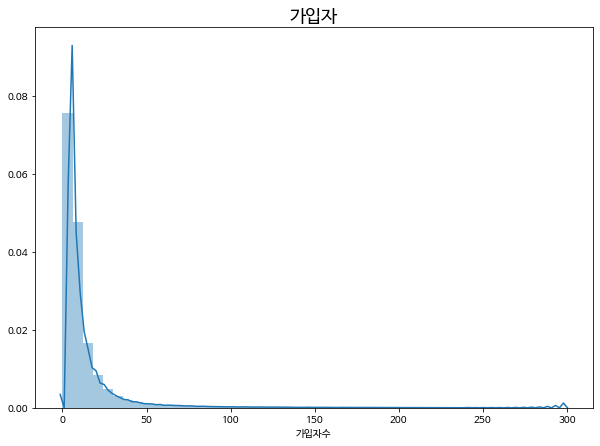

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(small['가입자수'])
plt.title('가입자', fontsize=18)
plt.show()

In [ ]:
small.sort_values(by='상실', ascending=False)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
319922,대구시청/교육협력정책관,277,0,277,12089720,43645.20,484946.65,5819359.81
491845,달서구청/일자리지원과 코로나19단기일자리,253,17,253,26676980,105442.61,1171584.54,14059014.49
349665,포항시청,253,13,252,35648640,140903.72,1565596.84,18787162.06
36026,서구청 경제과,252,4,246,30881700,122546.43,1361626.98,16339523.81
503301,동구청/경제지원과/방역 및 기타,236,0,236,23220160,98390.51,1093227.87,13118734.46
...,...,...,...,...,...,...,...,...
200413,백경이엔에스,10,0,0,2408640,240864.00,2676266.67,32115200.00
200412,경기정보통신,5,0,0,1438180,287636.00,3195955.56,38351466.67
200410,（주）남이제약,5,0,0,837160,167432.00,1860355.56,22324266.67
200409,우리숲어린이집,8,0,0,1096320,137040.00,1522666.67,18272000.00


### 사업장명 데이터 정제 (Cleansing)

In [ ]:
import re     # API 기능 확인

# 괄호안에 문자열 제거
pattern_1 = '\(.*\)'
pattern_2 = '\ (.*\) '
pattern_3 = '주식회사'

# (주), (주식회사) 문자열 제거

In [ ]:
re.sub(pattern_1, '', '브레인크루(주)')

'브레인크루'

In [ ]:
re.sub(pattern_3, '', '브레인크루(주식회사)')

'브레인크루()'

In [ ]:
# re.sub(pattern_2, '', ' (주) 타워홀딩스')  # pattern_2 에러의 원인? 

## 주식회사 문자열 제거하기

In [ ]:
re.sub(pattern_3, '', '브레인크루 주식회사')

'브레인크루 '

In [ ]:
def text_preprocess(text):
    text = re.sub(pattern_1, '', text)
    text = re.sub(pattern_2, '', text)
    text = re.sub(pattern_3, '', text)
    
    return text

In [ ]:
df_main['사업장명'] = df_main['사업장명'].apply(text_preprocess)

error: ignored

In [ ]:
df_main[df_main['사업장명'] == '패스트캠퍼스']

In [ ]:
df['사업장명'] = df['사업장명'].apply(text_preprocess)

In [ ]:
df.columns

Index(['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드',
       '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', '적용일',
       '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실', '인당고지금액', '평균월급', '평균연봉'],
      dtype='object')

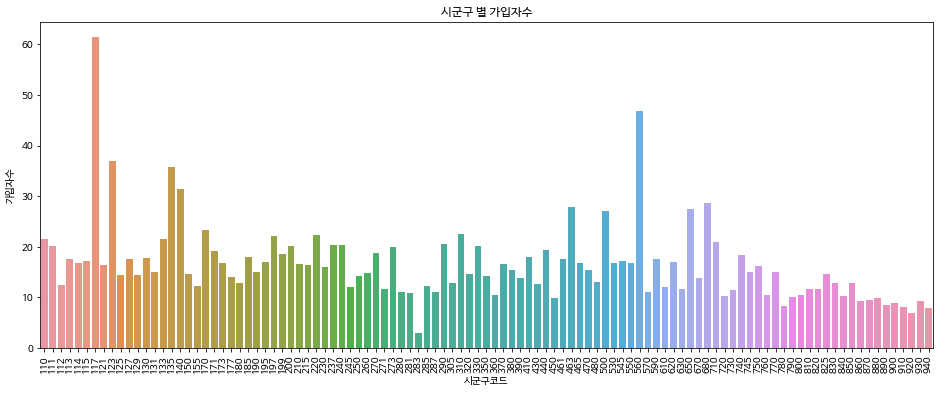

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(x=df.groupby('시군구코드')['가입자수'].mean().index, y=df.groupby('시군구코드')['가입자수'].mean())
plt.title('시군구 별 가입자수')
plt.xticks(rotation=90)
plt.show()

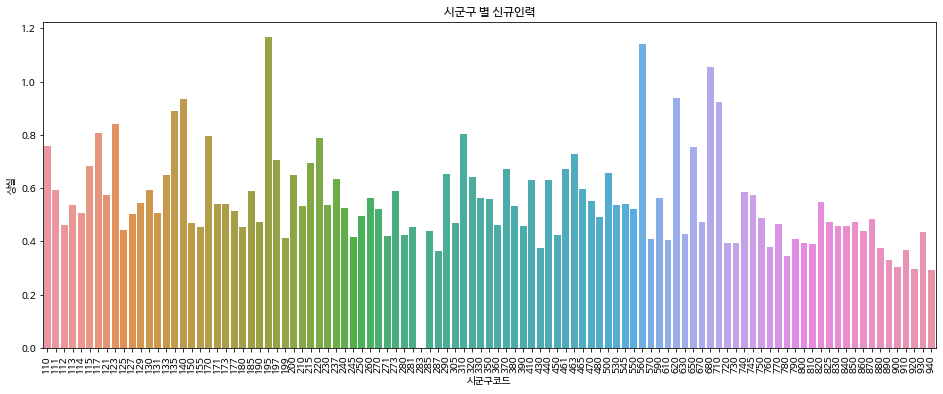

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=df.groupby('시군구코드')['상실'].mean().index, y=df.groupby('시군구코드')['상실'].mean())
plt.title('시군구 별 신규인력')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,시군구코드,읍면동코드,사업장형태,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실,인당고지금액,평균월급,평균연봉
0,202007,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,610,330,1,292201,동력식 수지 공구 제조업,19880101,10101,10101,5,792720,0,0,158544.00,1761600.00,21139200.00
1,202007,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,650,320,1,701700,화장터 운영 묘지 분양 및 관리업,19880101,10101,10101,13,3278460,0,0,252189.23,2802102.56,33625230.77
2,202007,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,590,101,1,659202,신용조합,19880101,10101,10101,14,4839540,0,1,345681.43,3840904.76,46090857.14
3,202007,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,260,119,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,19880101,10101,10101,28,5575460,0,0,199123.57,2212484.13,26549809.52
4,202007,희성전자(주),106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,170,131,1,701201,비주거용 건물 임대업(점포 자기땅),19880101,10101,10101,496,208935540,0,2,421241.01,4680455.65,56165467.74


In [ ]:
df.loc[df['시군구코드'] == 220][['사업장명', '지번주소', '신규']].sort_values(by='신규', ascending=False).head(20)

,사업장명,지번주소,신규
513991,대아이앤씨(주)-(일용)평택FAB2기신축공사중하층서편 상층동편공사중 일반설비5공구(...,경기도 평택시 고덕면,877
508965,주식회사 세보엠이씨(일용)일반설비 1공구(3-1),경기도 평택시 고덕면,784
493806,(주）세방테크-(일용)평택FAB2기신축공사중하층서편 상층동편 공사 중 일반설비4공구...,경기도 평택시 고덕면,371
4029,미공군경리처(오산충당),경기도 평택시 지산동,366
498697,(주）삼진일렉스-(일용)평택 FAB 2기 신축공사(하층서편) 중 일반전기공사 3-1 공구,경기도 평택시 장당동,250
498573,주식회사 세보엠이씨(일용)P2-하층서편 상층동편 기계배관공사(A),경기도 평택시 고덕면,244
503992,（주）통광-(일용)평택전자P2-PJT UT동 중 P2L CT동 하층서편 일반전기공사...,경기도 평택시 고덕면,243
488036,(주）세방테크-(일용)평택전자P2-PJT UT동P2LUT동하층서편 상층동편기계배관공...,경기도 평택시 고덕면,239
492563,대명지이씨（주）-(일용)평택 FAB2기 신축공사(하층서편)중 일반전기공사 3-2공구,경기도 평택시 고덕면,170
512740,(주)케이씨이앤씨-(일용)평택FAB2기신축공사중하층서편 상층동편공사GAS/PCW2공...,경기도 평택시 고덕면,169


In [ ]:
# 시군구코드 == 220 은 어느 지역을 의미하는지 알수 있는 방법?
df.loc[df['시군구코드'] == 220][['사업장명', '지번주소', '신규']].sort_values(by='신규', ascending=False).head(20)

,사업장명,지번주소,신규
513991,대아이앤씨(주)-(일용)평택FAB2기신축공사중하층서편 상층동편공사중 일반설비5공구(...,경기도 평택시 고덕면,877
508965,주식회사 세보엠이씨(일용)일반설비 1공구(3-1),경기도 평택시 고덕면,784
493806,(주）세방테크-(일용)평택FAB2기신축공사중하층서편 상층동편 공사 중 일반설비4공구...,경기도 평택시 고덕면,371
4029,미공군경리처(오산충당),경기도 평택시 지산동,366
498697,(주）삼진일렉스-(일용)평택 FAB 2기 신축공사(하층서편) 중 일반전기공사 3-1 공구,경기도 평택시 장당동,250
498573,주식회사 세보엠이씨(일용)P2-하층서편 상층동편 기계배관공사(A),경기도 평택시 고덕면,244
503992,（주）통광-(일용)평택전자P2-PJT UT동 중 P2L CT동 하층서편 일반전기공사...,경기도 평택시 고덕면,243
488036,(주）세방테크-(일용)평택전자P2-PJT UT동P2LUT동하층서편 상층동편기계배관공...,경기도 평택시 고덕면,239
492563,대명지이씨（주）-(일용)평택 FAB2기 신축공사(하층서편)중 일반전기공사 3-2공구,경기도 평택시 고덕면,170
512740,(주)케이씨이앤씨-(일용)평택FAB2기신축공사중하층서편 상층동편공사GAS/PCW2공...,경기도 평택시 고덕면,169


In [ ]:
df.loc[df['시군구코드'] == 560][['사업장명', '지번주소', '상실']].sort_values(by='상실', ascending=False).head(20)

,사업장명,지번주소,상실
62360,효성ITX (주),서울특별시 영등포구 양평동4가,441
14872,엘지전자(주),서울특별시 영등포구 여의도동,419
12843,(주)케이티아이에스,서울특별시 영등포구 여의도동,225
80024,(주)윌앤비전,서울특별시 영등포구 당산동4가,208
11394,(주)엘지화학,서울특별시 영등포구 여의도동,183
51238,(주)조은시스템,서울특별시 영등포구 문래동3가,157
187476,주식회사 발렉스서비스,서울특별시 영등포구 여의도동,157
723,(주)제이앤비컨설팅,서울특별시 영등포구 문래동3가,121
50923,(주)에프에이모스트,서울특별시 영등포구 양평동3가,113
74734,미성엠프로 주식회사,서울특별시 영등포구 당산동3가,110


### 업종별 신규 인력 현황

In [ ]:
df.groupby('업종코드명')['신규'].mean()

업종코드명
1차 금속제품 도매업         0.18
BIZ_NO미존재사업장        0.57
가공 및 정제염 제조업        0.14
가구 내 고용활동           1.44
가구 소매업              0.38
                    ... 
화훼류 및 식물 도매업        0.27
화훼작물 재배업            0.67
환경 관련 엔지니어링 서비스업    0.67
환경설비 건설업            0.22
휴양 콘도 운영업          15.14
Name: 신규, Length: 1142, dtype: float64

In [ ]:
df_1 = df.groupby('업종코드명')['신규'].mean()
df_1

업종코드명
1차 금속제품 도매업         0.18
BIZ_NO미존재사업장        0.57
가공 및 정제염 제조업        0.14
가구 내 고용활동           1.44
가구 소매업              0.38
                    ... 
화훼류 및 식물 도매업        0.27
화훼작물 재배업            0.67
환경 관련 엔지니어링 서비스업    0.67
환경설비 건설업            0.22
휴양 콘도 운영업          15.14
Name: 신규, Length: 1142, dtype: float64

In [ ]:
df_1.sort_values(ascending=False).count()

1142

In [ ]:
df_top100 = df_1.sort_values(ascending=False).head(50)

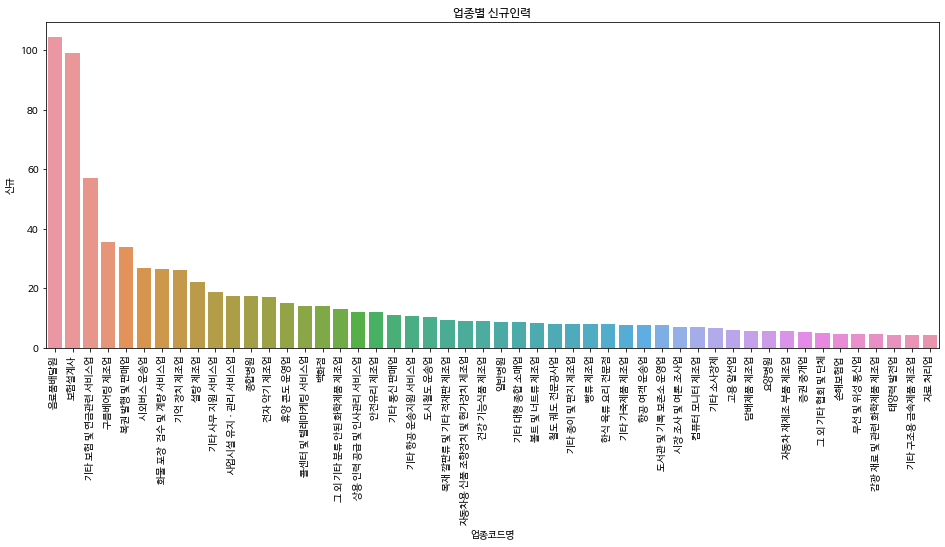

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(x=df_top100.index, y=df_top100)
plt.title('업종별 신규인력')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
def compare_and_visualize(company):
    code = df[df['사업장명'] == company]['업종코드']
    cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실', '업종코드']
    filtered = df.loc[df['업종코드']==code.item()][cols]
    df_company = df.loc[df['사업장명'] == company][cols]
    df_company = df_company.append(pd.Series(filtered.mean()), ignore_index=True)
    
    compare_cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실']
    for col in compare_cols:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=[company, '업종평균'], y=col, data=df_company)
        plt.title('{} vs 업종평균'.format(col), fontsize=18)
        plt.show()

In [ ]:
compare_and_visualize('패스트캠퍼스')

ValueError: ignored

# 2주차 수업 내용에 관한 자가 평가
## Description: Self-assessment for the Impact of Learning(IOL) about Learning intention  
### (1) 목표: pandas를 활용해 간단한 통계 분석과 함께 데이터 전처리에 대해 학습목표를 이해하였나? 체크: 그렇다
### (2) 내용: 탐색적 데이터 분석 방법과 기초 통계에 관한 이해력 향상에 도움이 되었는가? 체크: 아직 모르겠음
- (1 단계) EDA(Extrapolatory Data Analysis): 탐색적 데이터 분석
- (2 단계) 데이터 전처리 
- (3 단계) 판다스로 데이터 읽기 및 값 불러오기
- (4 단계) 기초 통계 방법에 관한 이해: p-value, 신뢰구간 등  

### (3) 실습 완료 평가: [경제 데이터를 분석]
- 국민연금 데이터를 통한 포스트 코로나 시대 경제 상황 분석 보고서를 이용하였나? 체크: 그렇다
- Pandas 사용하였나? 체크: 그렇다 
- EDA 방법을 적용해 보았나? 체크: 그렇지 않다
- 국민연금기관에서 국민연금에 가입한 고용인에 대한 연봉 데이터를 통한 연금보험액 납부 자료를 이용하여 "데이터 전처리" 실습을 해보았나? 체크: text-prepocess 함수를 배움
